# Laguerre Iteration

Laguerre's method is a root-finding algorithm that has cubic convergence and it is almost always guaranteed to converge to some root of the polynomial. More info can be found at H.J.Orchard's paper $\href{https://ieeexplore.ieee.org/document/41294}{\text{The Laguerre method for finding the zeros of polynomials}}$. The algorithm uses the following iteration scheme: 
$$x_{k+1} = x_k +  n / ( - \mu (x) + s \sqrt{ (n-1)  (- n  \mu^{'}(x) - \mu^2(x)) }$$
where $\mu(x)=f^{'}(x)/f(x)$ and $s=\pm 1$ depending on when it will provide maximum value in the denominator for $x_{k+1}$.

In [4]:
import numpy as np
import sympy
import cmath
import matplotlib.pyplot as plt

def Lagg(f, x0, n, k, tol):
    '''
    :param f: function you want to find the roots with variable z (it can be used for complex & real functions)
    :param x_k: the iniitial guess
    :param n: order of polynomial ( e.g. n=1 for p(z) = z**2 -1 )
    :param k: up to what iteration are we finding x, x_k
    :return: x_k_1, i where "x_k_1" is the root and "i" is the number of iterations it took
    '''
    z = sympy.symbols('z')
    f_pr = sympy.lambdify(z, sympy.diff(f(z),z))
    mu = lambda z: f_pr(z)/f(z)
    mu_pr = sympy.lambdify(z, sympy.diff(mu(z),z))

    x_k = x0
    for i in range(k+1):
        s = 1
        x1 = np.abs(-f_pr(x_k)/f(x_k)+s*np.sqrt((n-1)*(-n*mu_pr(x_k) - mu(x_k)**2)))
        x2 = np.abs(-f_pr(x_k)/f(x_k)-s*np.sqrt((n-1)*(-n*mu_pr(x_k) - mu(x_k)**2)))
        if x2 > x1:
            s = -1
        if x2 < x1:
            s = 1

        x_k_1 = x_k + n / ( - mu(x_k) + s * cmath.sqrt( (n-1) * (- n * mu_pr(x_k) - mu(x_k)*mu(x_k) ) ) )

        if np.abs(x_k_1 - x_k) < tol:
            break
            
        x_k = x_k_1
    return x_k, i


Here is some sample code for testing the function

//anaconda/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


Text(0, 0.5, 'Number of Iterations')

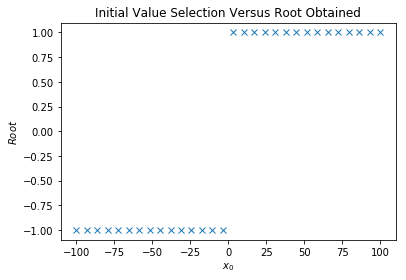

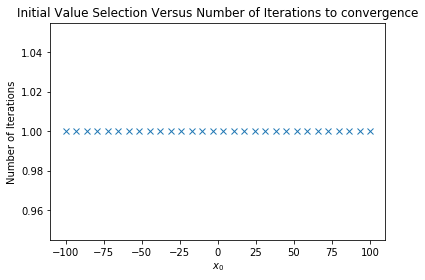

In [6]:
#sample code testing the function
x0_array = np.linspace(-100,100,30)
store = np.zeros((len(x0_array),3)) # 1st column for x_k, 2nd for # of iter., 3rd for x0

for i,x0_s in enumerate(x0_array):
    store[i,0] = Lagg(f = lambda z: z**2 - 1,x0 = x0_s,n=2,k=10,tol=10**(-5))[0]
    store[i,1] = Lagg(f = lambda z: z**2 - 1,x0 = x0_s,n=2,k=10,tol=10**(-5))[1]
    store[i,2] = x0_s

fig = plt.figure(1)
axes = fig.add_subplot(1, 1, 1)
axes.plot(store[:,2], store[:,0], 'x')
axes.set_title('Initial Value Selection Versus Root Obtained')
axes.set_xlabel("$x_0$")
axes.set_ylabel("$Root$")

fig = plt.figure(2)
axes = fig.add_subplot(1, 1, 1)
axes.plot(store[:,2], store[:,1], 'x')
axes.set_title('Initial Value Selection Versus Number of Iterations to convergence')
axes.set_xlabel("$x_0$")
axes.set_ylabel("Number of Iterations")